Delta Loss hinge: x=(0, 2), y=1, dLoss=[ 0 -2]
Delta Loss hinge: x=(-2, 0), y=1, dLoss=[2 0]
Delta Loss hinge: x=(1, -1), y=-1, dLoss=[ 1 -1]
Loss at iteration 0: w=[-0.1  0.1], gradiant=[ 1. -1.]
Delta Loss hinge: x=(0, 2), y=1, dLoss=[ 0 -2]
Delta Loss hinge: x=(-2, 0), y=1, dLoss=[2 0]
Delta Loss hinge: x=(1, -1), y=-1, dLoss=[ 1 -1]
Loss at iteration 1: w=[-0.2  0.2], gradiant=[ 1. -1.]
Delta Loss hinge: x=(0, 2), y=1, dLoss=[ 0 -2]
Delta Loss hinge: x=(-2, 0), y=1, dLoss=[2 0]
Delta Loss hinge: x=(1, -1), y=-1, dLoss=[ 1 -1]
Loss at iteration 2: w=[-0.3  0.3], gradiant=[ 1. -1.]
Delta Loss hinge: x=(0, 2), y=1, dLoss=[ 0 -2]
Delta Loss hinge: x=(-2, 0), y=1, dLoss=[2 0]
Delta Loss hinge: x=(1, -1), y=-1, dLoss=[ 1 -1]
Loss at iteration 3: w=[-0.4  0.4], gradiant=[ 1. -1.]
Delta Loss hinge: x=(0, 2), y=1, dLoss=[ 0 -2]
Delta Loss hinge: x=(-2, 0), y=1, dLoss=[2 0]
Delta Loss hinge: x=(1, -1), y=-1, dLoss=[ 1 -1]
Loss at iteration 4: w=[-0.5  0.5], gradiant=[ 1. -1.]
Delta Loss hing

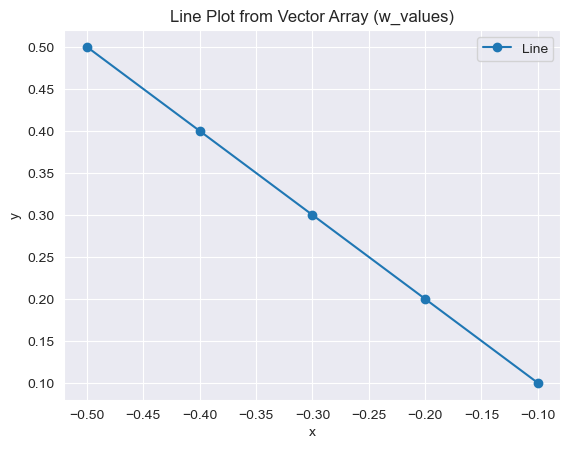

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

trainingData = [
    [0, 2, 1],
    [-2, 0, 1],
    [1, -1, -1],
]

def phi(x1, x2):
    return np.array([x1, x2])

def loss(w, x1, x2, y):
    return max(1 - w.dot(phi(x1, x2)) * y, 0)

def trainLoss(w):
    return 1 / len(trainingData) * sum(loss(w, x1, x2, y) for x1, x2, y in trainingData)

# this results in a 1 x 2 matrix, [0, 0], [0.47, 1.27] ...
def gradiantTrainLoss(w):

    total = 0
    for x1, x2, y in trainingData:
        temp = 1 - w.dot(phi(x1, x2)) * y
        deltaLoss = 0
        if temp > 0:
            deltaLoss = -phi(x1, x2) * y
            total += deltaLoss

        print(f"Delta Loss hinge: x={x1, x2}, y={y}, dLoss={deltaLoss}")

    return 1 / len(trainingData) * total

def gradiantDescent(gradiantFunc, step):
    w = np.array([0, 0])
    w_values = []
    iteration = 0  # Manual iteration counter

    while True:
        gradiant = gradiantFunc(w)
        w = w - step * gradiant
        if np.linalg.norm(gradiant) < 1e-9:  # Convergence condition
            break
        if iteration > 5000:  # Iteration limit to prevent infinite loops
            print("Iteration limit reached. Stopping.")
            break
        w_values.append(w.copy())
        print(f"Loss at iteration {iteration}: w={w}, gradiant={gradiant}")
        iteration += 1  # Increment iteration counter

    # Plot the line using coordinates from w_values
    w_df = pd.DataFrame(w_values, columns=["x", "y"])
    plt.plot(w_df["x"], w_df["y"], marker="o", label="Line")
    plt.title("Line Plot from Vector Array (w_values)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

gradiantDescent(gradiantTrainLoss, 0.1)